#Part I: Linear Classifier By Hand (Guided)

##1.1 Get the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/intro_ml/

/content/gdrive/MyDrive/intro_ml


In [ ]:
import sys, os
import numpy as np
import pandas as pd

##1.2 Data pre-processing

### 1.2.1 Explore the Data

In [ ]:
data_path = "/content/gdrive/MyDrive/intro_ml/"
data_file = "ml_tutorial_2_calo_shower_data.csv"

In [ ]:
df = pd.read_csv(data_file)
df.head()

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


In [ ]:
df.shape # to check data dimensions

(100000, 3)

### 1.2.2 Labels to Binary

In [ ]:
# initializa a y column stores the labels (targets)
df["y"]=0
df.head()

,shower_depth,shower_width,type,y
0,102.726547,41.060509,hadron,0
1,55.953644,19.107106,electron,0
2,76.237938,21.859595,electron,0
3,145.829765,18.478401,hadron,0
4,151.974596,33.539821,hadron,0


In [ ]:
# update y: containing 1 if the sample is an electron shower and 0 if it is a hadron one.
df.loc[df['type']=='electron', 'y'] = 1
df.head()

,shower_depth,shower_width,type,y
0,102.726547,41.060509,hadron,0
1,55.953644,19.107106,electron,1
2,76.237938,21.859595,electron,1
3,145.829765,18.478401,hadron,0
4,151.974596,33.539821,hadron,0


###1.2.3 Create Feature Matrix

In [ ]:
X = df.drop(columns=['type','y']).values # to remove the type and y columns.
y = df["y"].values

# .values is used to convert the pandas DataFrames into NumPy arrays
# which are optimized for the mathematical operations.

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100000, 2)
y shape: (100000,)


### 1.2.4 Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#  Using random_state=42 ensures that the random split is reproducible,
# meaning anyone running the code will get the exact same division of data, which is essential for consistent results.

# Check shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
# 80,000 rows × 2 columns.
# Each row = one training example.
# Each column = one feature.
#1-dimensional array with 80,000 elements.
print(f"X_test:  {X_test.shape},  y_test: {y_test.shape}")


X_train: (80000, 2), y_train: (80000,)
X_test:  (20000, 2),  y_test: (20000,)


### 1.2.5 Feature Scaling

In [ ]:
# check the mean of the training set before scaling
mean_train = [df["shower_depth"].mean(), df["shower_width"].mean()]
mean_train

[np.float64(99.84770284001912), np.float64(25.0603216349967)]

In [ ]:
# Get mean and std from training data
mean_train = [df["shower_depth"].mean(), df["shower_width"].mean()]
std_train = [df["shower_depth"].std(), df["shower_width"].std()]

# Standardize training
X_train_scaled = (X_train - mean_train)/ std_train

# Standardize test data
X_test_scaled  = (X_test - mean_train)/ std_train

# Check mean and std values after scaling
print("X_train_scaled mean:", X_train_scaled.mean(axis=0)) # calculate the mean value of each feature (column).
print("X_train_scaled std:", X_train_scaled.std(axis=0))   # calculate the std value of each feature (column).

X_train_scaled mean: [ 0.00081499 -0.00229316]
X_train_scaled std: [0.99855543 1.00035996]


### 1.2.6 Feature Matrix Augmentation

In [ ]:
# add a column of ones to our matrix X to simplify the vectorized computations with the bias term.
X_train_aug = np.hstack((np.ones((X_train.shape[0],1)), X_train_scaled))
X_test_aug  = np.hstack((np.ones((X_test.shape[0],1)), X_test_scaled))

# Check shapes
print("X_train_aug", X_train_aug.shape)
print("X_test_aug", X_test_aug.shape)

X_train_aug (80000, 3)
X_test_aug (20000, 3)


##1.3 Functions

### 1.3.1 Hypothesis Function

In [ ]:
# Hypothesis Function
def lin_sum(X, thetas):
    """
    Compute the linear combination of input features and parameters.

    Parameters
    ----------
    X : array-like, shape (m_samples, n_features+1)
        Input features (already augmented with a column of ones for bias).
    thetas : array-like, shape (n_features+1,)
        Parameter vector including bias term.

    Returns
    -------
    ndarray, shape (m_samples, 1)
        Linear sum for each sample.
    """

    return np.matmul(X,thetas)

In [ ]:
# Understanding the different types of matrix multiplication
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([5, 6])
result1 = arr1 * arr2            # [5,12],[15 24] ELEMENTWISE MULTIPLICATION
result2 = arr1 @ arr2            # [17 39] MATRIX MULTIPLICATION
result3 = np.dot(arr1, arr2)     # [17 39] MATRIX MULTIPLICATION
result4 = np.matmul(arr1, arr2)  # [17 39] MATRIX MULTIPLICATION
print(result1)
print(result2)
print(result3)
print(result4)

[[ 5 12]
 [15 24]]
[17 39]
[17 39]
[17 39]


### 1.3.2 Logistic Function

In [ ]:
def sigmoid(z):


    return 1 / (1 + np.exp(-z))

### 1.3.3 Partial Derivatives of Cross-Entropy Cost Function

In [ ]:
# Calculates the partial derivatives (the gradient) of the cost function with respect to each parameter θ.
# This gradient tells the algorithm which direction to adjust the parameters to reduce the cost.


def gradient_cross_entropy(y_true, y_pred, X):
    """
    Compute the gradient vector of the cross-entropy cost function.

    Parameters
    ----------
    y_true : array-like, shape (m,) or (m,1)
        Binary target (0 or 1) for each sample.
    y_pred : array-like, shape (m,) or (m,1)
        Predicted score for each sample.
    X : array-like, shape (m, n_features+1)
        Input features, already augmented with a column of ones for bias.

    Returns
    -------
    ndarray, shape (n_features+1, 1)
        Column vector of partial derivatives with respect to each model parameter.
    """

    # reshape : That line reshapes the array y_true into a column vector.
    # "-1 means: figure out this dimension automatically based on the data size.""
    # ”1 means: make the second dimension have size 1 (a single column).”

    y_true = y_true.reshape(-1,1)
    m = X.shape[0]
    return (1/m) * (X.T @ (y_pred - y_true))

### 1.3.4 Cross-Entropy Cost Function

In [ ]:
# measures how far the predicted probabilities are from the actual 0/1 labels.
def cross_entropy_cost(y_true, y_pred):

  # np.clip(array, min, max) limits the values of an array.
  # Any value below min becomes min.
  # Any value above max becomes max.
  # Values in between stay unchanged.
  # Clipping prevents that by keeping probabilities slightly away from 0 and 1.

  # Your code here
      m = y_true.shape[0]
      y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15) # This prevents taking log(0).
      y_true = y_true.reshape(-1,1)
      # print(y_true.shape)
      # print(y_pred.shape)
      return (-1/m) * np.sum(y_true* np.log(y_pred) + (1-y_true)* np.log(1-y_pred))

## 1.4 Classifier Loop

In [ ]:
def should_print_iteration(iter_index, first_step, second_step, index_changing_step):
    """
    Trigger a print if iter_index matches step rules:
    print every `first_step` iterations before `index_changing_step`,
    then every `second_step` iterations afterwards.
    """
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:
# Hyperparameters
alpha       = 0.1    # learning rate
N           = 20000   # maximum number of iterations
epsilon     = 1e-6   # tolerance threshold for gradient norm (stopping criterion)
cost_tol    = 1e-8   # tolerance threshold for cost drop (stop. criterion)
cost_change = np.inf # initialize cost change for first iteration

# Number of features + 1 (number of columns in X)
n_param = X_train_aug.shape[1]

# Initialization of theta vector
thetas = np.zeros((n_param,1))

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

for iter_idx in range(N):
    # Get predictions (hypothesis function)
    # ... your code here ...
    y_pred_train = sigmoid(lin_sum(X_train_aug, thetas))
    y_pred_test  = sigmoid(lin_sum(X_test_aug , thetas))

    # Calculate and store costs with train and test datasets
    cost_train = cross_entropy_cost(y_train, y_pred_train)
    cost_test  = cross_entropy_cost(y_test, y_pred_test)
    costs_train.append(cost_train)
    costs_test.append(cost_test)

    # ... your code here for gradient computation & parameter update
    gradient_cost= gradient_cross_entropy(y_train, y_pred_train, X_train_aug)
    thetas = thetas - alpha * gradient_cost

    # gradient_cost is a vector, grad_cost_norm is a single scalar representing its magnitude/length.
    # the norm of the gradient tells you how steep the cost function is.
    # If grad_cost_norm is large, you’re far from a minimum.
    # If it’s close to 0, you’re near a critical point (possibly a minimum).
    grad_cost_norm = np.linalg.norm(gradient_cost)


    # Cost change (for early stopping & printing)
    if iter_idx > 0:
        cost_change = cost_train - costs_train[-2]

    # Print selected iterations
    if should_print_iteration(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"‖grad‖ = {grad_cost_norm.item():.4e}\t"
            f"Train cost = {cost_train:.5e}\t"
            f"Cost change = {cost_change:>+10.2e}\t"
            f"Test cost = {cost_test:.5e}"
        )

    # Exit conditions
    # ... your code here ...
    if abs(cost_change) < cost_tol and grad_cost_norm < epsilon:
      print(f"\nConvergence reached! Stopping gradient descent after {iter_idx+1} iterations.")
      break



print(f'\nEnd of gradient descent after {iter_idx+1} iterations')

print('Optimized parameters:')
for j in range(len(thetas)):
    print(f'\tParameter {j} = {thetas[j,0]:.4f}')

Starting gradient descent

Iter    0	‖grad‖ = 4.2568e-01	Train cost = 6.93147e-01	Cost change =       +inf	Test cost = 6.93147e-01
Iter   10	‖grad‖ = 3.0618e-01	Train cost = 5.59112e-01	Cost change =  -9.82e-03	Test cost = 5.57861e-01
Iter   20	‖grad‖ = 2.3208e-01	Train cost = 4.86803e-01	Cost change =  -5.59e-03	Test cost = 4.84770e-01
Iter   30	‖grad‖ = 1.8498e-01	Train cost = 4.43322e-01	Cost change =  -3.53e-03	Test cost = 4.40746e-01
Iter   40	‖grad‖ = 1.5309e-01	Train cost = 4.14713e-01	Cost change =  -2.41e-03	Test cost = 4.11725e-01
Iter   50	‖grad‖ = 1.3024e-01	Train cost = 3.94602e-01	Cost change =  -1.74e-03	Test cost = 3.91285e-01
Iter   60	‖grad‖ = 1.1312e-01	Train cost = 3.79760e-01	Cost change =  -1.31e-03	Test cost = 3.76168e-01
Iter   70	‖grad‖ = 9.9815e-02	Train cost = 3.68395e-01	Cost change =  -1.01e-03	Test cost = 3.64568e-01
Iter   80	‖grad‖ = 8.9186e-02	Train cost = 3.59441e-01	Cost change =  -8.08e-04	Test cost = 3.55407e-01
Iter   90	‖grad‖ = 8.0497e-02	Train c

### Parameters Verification using ready-to-use function "Scikit-learn"

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings

# Scikit-learn might give a warning that the model is not converging with default iterations,
# so we'll tell it to ignore that specific warning for cleanliness.
warnings.filterwarnings('ignore', category=UserWarning, message='lbfgs failed to converge')

def verify_parameters(manual_thetas, X_train_scaled, y_train):
    """
    Trains a Scikit-learn Logistic Regression model and compares its parameters
    with the ones found by the manual gradient descent implementation.

    Parameters:
    manual_thetas (np.array): The final parameter vector [bias, theta1, theta2, ...]
                              from the manual implementation.
    X_train_scaled (np.array): The scaled (but NOT augmented with a column of ones)
                               training features.
    y_train (np.array): The training labels.
    """
    print("--- Verifying Parameters with Scikit-learn ---")

    # 1. Initialize and train the scikit-learn model
    # We set penalty='none' to make it a fair comparison to your implementation,
    # which does not include regularization. We also increase max_iter to ensure it converges.
    sklearn_model = LogisticRegression(penalty=None, max_iter=5000)
    sklearn_model.fit(X_train_scaled, y_train)

    # 2. Extract the learned parameters from scikit-learn
    # Scikit-learn stores the bias (intercept) and weights (coefficients) separately.
    sklearn_bias = sklearn_model.intercept_[0]
    sklearn_weights = sklearn_model.coef_[0]

    # 3. Extract parameters from your manual implementation
    # Your 'thetas' array has the shape (3, 1), with the bias as the first element.
    manual_bias = manual_thetas[0, 0]
    manual_weights = manual_thetas[1:, 0]

    # 4. Print the comparison in a clean table format
    print("\nParameter Comparison:")
    print(f"{'Parameter':<15} | {'Your Manual Value':<20} | {'Scikit-learn Value':<20}")
    print("-" * 60)
    print(f"{'Bias (θ₀)':<15} | {manual_bias:<20.4f} | {sklearn_bias:<20.4f}")
    for i, (manual_w, sklearn_w) in enumerate(zip(manual_weights, sklearn_weights)):
        print(f"{f'Weight θ{i+1}':<15} | {manual_w:<20.4f} | {sklearn_w:<20.4f}")

    print("\n--- Interpretation ---")
    print("The values should be very close. Minor differences are expected and can occur due to:")
    print("- Different optimization algorithms (sklearn uses sophisticated solvers like 'lbfgs' by default, not standard gradient descent).")
    print("- Different default tolerance levels and stopping criteria for convergence.")

# --- Call the function to see the results ---
# Use your final 'thetas' variable and the scaled (not augmented) training data
verify_parameters(thetas, X_train_scaled, y_train)

--- Verifying Parameters with Scikit-learn ---

Parameter Comparison:
Parameter       | Your Manual Value    | Scikit-learn Value  
------------------------------------------------------------
Bias (θ₀)       | -0.3268              | -0.3268             
Weight θ1       | -2.5924              | -2.5921             
Weight θ2       | -1.7805              | -1.7804             

--- Interpretation ---
The values should be very close. Minor differences are expected and can occur due to:
- Different optimization algorithms (sklearn uses sophisticated solvers like 'lbfgs' by default, not standard gradient descent).
- Different default tolerance levels and stopping criteria for convergence.


## 1.5 Plot cost versus epochs

In [ ]:
import matplotlib.pyplot as plt
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

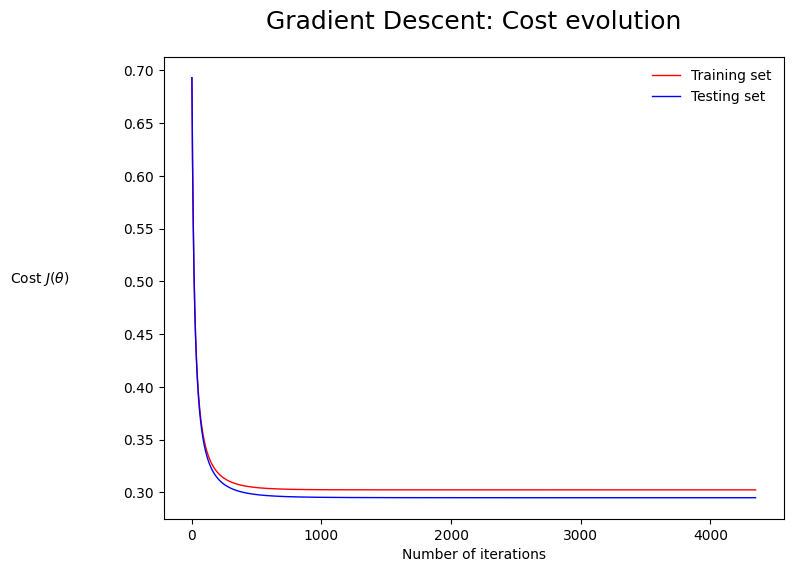

In [ ]:
import matplotlib.pyplot as plt
plot_cost_vs_iter(costs_train, costs_test)

### 1.5.1 Plot Interpretation

Both the red (Training) and blue (Testing) curves start with a high cost and decrease over time. This is the ideal behavior and shows that the model is learning. With each iteration, the gradient descent algorithm is successfully adjusting the thetas to make better predictions and reduce the error. The small gap means that the model's performance on the data it has never seen before (the test set) is nearly as good as its performance on the data it was trained on "good generalization".

###1.5.2 Cost gap.

**What would it mean if there were a larger gap between the training and test cost values?**

a large gap would be a sign of overfitting. It becomes so specialized in the training examples that it starts to memorize the noise and random fluctuations in the data, rather than learning the true underlying pattern. In this case, The gap between the red and blue lines would become large and progressively wider as training continues.

##1.6 Performance Measures

###1.6.1 Binary Predictions

In [ ]:
def make_predictions(thetas, X, boundary=0.5):
    scores = sigmoid(lin_sum(X, thetas)).flatten() # shape (m,)
    return (scores >= boundary).astype(int)

In [ ]:
y_test_pred = make_predictions(thetas, X_test_aug, boundary=0.5)
y_test_pred

array([1, 0, 1, ..., 0, 1, 1])

###1.6.2 Accuracy

In [ ]:
# compute accuracy
# accuracy = (number of correct predictions) / (total number of predictions)

m = X_test_aug.shape[0]
accuracy = (np.sum(y_test_pred == y_test)) / m
print(f"The model's accuracy on the test set is: {accuracy*100}%")

The model's accuracy on the test set is: 88.06%


### 1.6.3 Recall

In [ ]:
# recall = no. of positives correctly detected / actual postives

# True Positives (TP): Correctly identified electrons
true_positives = np.sum((y_test == 1) & (y_test_pred == 1))

# False Negatives (FN): Electrons that were missed (predicted as hadron)
false_negatives = np.sum((y_test == 1) & (y_test_pred == 0))


recall = true_positives / (true_positives + false_negatives)

# This means the model successfully identified 90% of all the electrons in the test set.
# The remaining 10% were missed (classified as hadrons).
print(f"The model's recall on the test set is {recall}")

The model's recall on the test set is 0.9049005824462744


### 1.6.3 Precision

In [ ]:
# precision = no. of positives correctly detected / all postives

# True Negatives (TN): Correctly identified hadrons.
true_negatives = np.sum((y_test == 0) & (y_test_pred == 0))

# False Positives (FP): Hadrons that were misidentified as electrons
false_positives = np.sum((y_test == 0) & (y_test_pred == 1))

precision = true_positives / (true_positives + false_positives)

# This means that when your model predicted a particle was an electron, it was correct 86.2% of the time.
# The other 10.7% of the time, it was a false positive (a hadron misclassified as an electron).
print(f"The model's precision on the test set is {precision}")

The model's precision on the test set is 0.8621316494450822


### 1.6.3 F-score

In [ ]:
# Describes the balance between Precision and Recall. It is the harmonic mean of the two
F1= 2* (precision*recall)/(precision+recall)

print(f"The model's F-score on the test set is {F1}")

The model's F-score on the test set is 0.8829985301322881


# Part II: Draw Decision Boundaries

In [ ]:
all_sig = df[df['type'] == 'electron'][['shower_depth', 'shower_width']]
all_bkg = df[df['type'] ==  'hadron' ][['shower_depth', 'shower_width']]

In [ ]:
X1NAME = 'shower_depth'; X1LABEL = 'Shower depth [mm]'
X2NAME = 'shower_width'; X2LABEL = 'Shower width [mm]'
X1MIN  = 0 ; X1MAX = 200
X2MIN  = 0 ; X2MAX =  60

# Raw scatter plot
def plot_scatter(sig, bkg, boundaries=False,
                 train_mean=mean_train, train_std=std_train,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='dodgerblue', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='darkorange', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  # if boundaries:
  if boundaries:
        boundaries = get_boundary_line_x2([0.9,0.75,0.5,0.25,.01], thetas,
                                          x1min, x1max,
                                          train_mean=train_mean,
                                          train_std=train_std)
        for b in boundaries:
            ax.plot([x1min, x1max],
                    [b["x2_left"], b["x2_right"]],
                    label=f"τ={b['threshold']}",
                    lw=2)


  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()

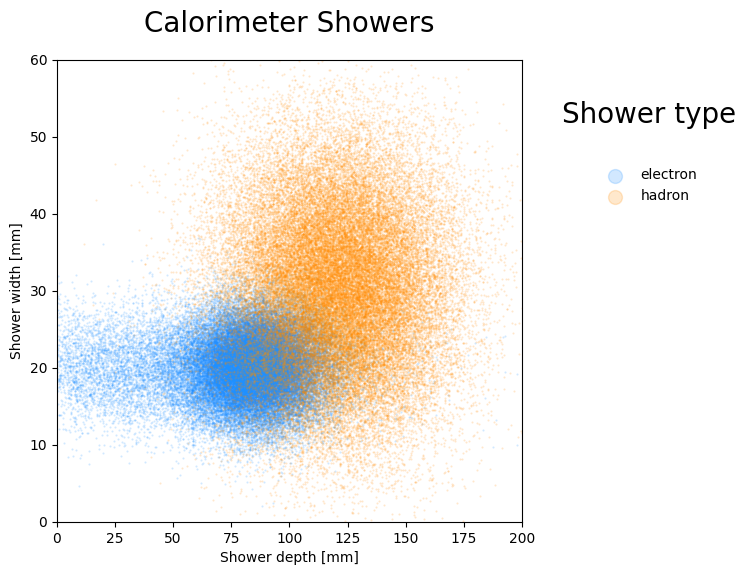

In [ ]:
plot_scatter(all_sig, all_bkg,
             figsize=(6, 6), fontsize=20, alpha=0.2, title="Calorimeter Showers")

In [ ]:
def rev_sigmoid(y):
  # Ensure y is within a valid range to avoid log(0) or log(negative)
  y = np.clip(y, 1e-15, 1 - 1e-15)
  return np.log(y/(1-y))

In [ ]:
def scale_inputs(X_raw, mean, std):
    """
    Scales raw input features according to the standardization procedure.

    Parameters:
    X_raw : (m_samples, n_features)
    mean -> (n_features,) -> Mean of each feature from the training data.
    std -> (n_features,) -> standard deviation of each feature from the training data.

    Returns:
    nshape (m_samples, n_features)
    """
    return (X_raw - mean) / std

In [ ]:
def unscale_inputs(X_scaled, mean, std):
    return (X_scaled * std) + mean

In [ ]:
def get_boundary_line_x2(thresholds, thetas,
                         x1min, x1max,
                         train_mean, train_std):
    """
    Compute boundary line coordinates (in raw units) for given thresholds.

    thresholds : list of floats
    thetas     : array-like (3x1) [bias, theta1, theta2]
    x1min, x1max : min/max in RAW units
    train_mean, train_std : arrays with means/stds of training features
    """
    results = []

    # Scale x1 endpoints
    x1_scaled = scale_inputs(np.array([x1min,x1max]),
                             train_mean[0], train_std[0]).flatten()

    for tau in thresholds:
        logit_tau = rev_sigmoid(tau)  # same as np.log(tau/(1-tau))

        # Compute x2 in standardized space
        x2_left_std  = (logit_tau - thetas[0,0] - thetas[1,0]*x1_scaled[0]) / thetas[2,0]
        x2_right_std = (logit_tau - thetas[0,0] - thetas[1,0]*x1_scaled[1]) / thetas[2,0]

        # Unscale x2 back to raw units
        x2_left  = unscale_inputs(x2_left_std,  train_mean[1], train_std[1])
        x2_right = unscale_inputs(x2_right_std, train_mean[1], train_std[1])

        results.append({
            "threshold": tau,
            "x2_left": x2_left,
            "x2_right": x2_right
        })

    return results


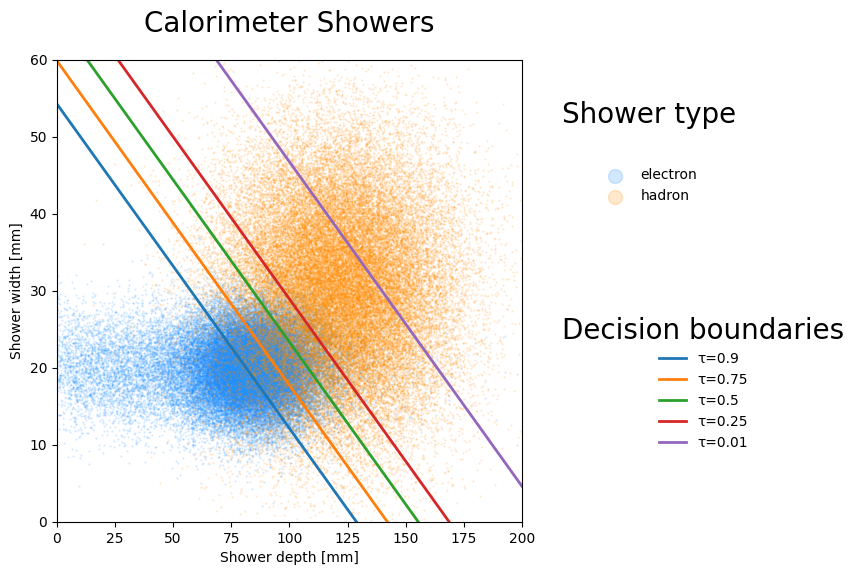

In [ ]:
plot_scatter(all_sig, all_bkg,boundaries = True
             ,figsize=(6, 6), fontsize=20, alpha=0.2, title="Calorimeter Showers")